# Feature Engineering. Практическая работа

Сдаётся на проверку.

## Цели практической работы

Научиться:

*   генерировать новые признаки;
*   нормализовать и кодировать данные с помощью lambda-функций и библиотеки scikit-learn.


## Что входит в практическую работу

1. Построить признаки из строк.
2. Преобразовать категориальные переменные.
3. Стандартизировать данные.
4. Использовать MinMaxScaler для нормализации данных.
5. Создать признаки на основе дат.
6. Сохранить датафрейм для этапа моделирования.

## Что оценивается
- Программа выдаёт верный ответ на заданном наборе данных.
- Описаны причины выбранного решения, если требуется.
- Код читабелен: переменным даны осмысленные названия, соблюдены отступы и правила расстановки пробелов.
- При построении графиков название и оси подписаны, выведена легенда, если требуется.
- Репозиторий проекта содержит осмысленные коммиты, содержащие конкретные реализованные фичи, ветки названы согласно назначению, лишние файлы не хранятся в репозитории.
- В репозитории проекта соблюдена иерархия директорий согласно списку модулей и содержащихся в них тем.
- Репозиторий проекта содержит файлы с данными, полученными в результате выполнения практической работы.


## Как отправить работу на проверку
Сдайте практическую работу этого модуля через систему контроля версий Git сервиса Skillbox GitLab. После загрузки работы на проверку напишите об этом в личном кабинете своему проверяющему куратору.


## Задача

Мы продолжим исследовать и готовить данные для этапа моделирования.

Вам предстоит работать с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах, представленной в файле `data/vehicles_dataset_upd.csv`. На этих данных вы построите первую модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

В этой практической работе вы продолжите генерировать дополнительные признаки и завершите подготовку датасета для этапа моделирования.

## Описание датасета:
- `id`— идентификатор записи;
- `url`— URL-записи о продаже;
- `region`— регион;
- `region_url`— URL региона;
- `price`— стоимость;
- `year`— год выпуска;
- `manufacturer`— производитель;
- `model`— модель;
- `condition`— состояние;
- `cylinders`— количество цилиндров;
- `fuel`— тип топлива;
- `odometer`— количество пройденных миль;
- `title_status`— статус;
- `transmission`— коробка передач;
- `VIN`— идентификационный номер;
- `drive`— тип привода;
- `size`— размер;
- `type`— кузов;
- `paint_color`— цвет;
- `image_url`— URL изображения;
- `description`— указанное описание;
- `county`— страна;
- `state`— штат;
- `lat`— широта;
- `long`— долгота;
- `posting_date`— дата размещения объявления о продаже;
- `price_category`— категория цены.


In [ ]:
# Импортируйте необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Задача 1. Построение признаков из строк

1. Загрузите датасет из `data/vehicles_dataset_upd6.csv`, выведите первые пять записей и список колонок.

In [ ]:
# Ваш код здесь
df = pd.read_csv('/content/drive/MyDrive/SkillBox/Feature_Processing/vehicles_dataset_upd6.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,manufacturer_model,desc_len,model_in_desc,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,std_scaled_odometer,std_scaled_price
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,ram: 2500 crew cab big horn,4482,0,1.0,0.0,0.0,0.0,0.0,-1.079390,2.958509
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,ford: explorer 4wd 4dr xlt,968,0,0.0,0.0,0.0,0.0,1.0,-0.560115,-0.085826
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,volkswagen: golf r hatchback,4286,0,0.0,0.0,1.0,0.0,0.0,-1.292863,1.406256
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,toyota: rav4,3241,0,0.0,0.0,1.0,0.0,0.0,0.352621,-0.281218
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,bmw: 1 series 128i coupe 2d,4851,0,0.0,0.0,0.0,0.0,1.0,-0.234311,-0.274017


2. Выведите список значений и количество уникальных значений для модели автомобиля.

In [ ]:
df['model']

0          2500 crew cab big horn
1            explorer 4wd 4dr xlt
2                golf r hatchback
3                            rav4
4          1 series 128i coupe 2d
                  ...            
9614                         rav4
9615                     wrangler
9616    a3 2.0t premium plus pzev
9617                      cayenne
9618       1500 crew cab big horn
Name: model, Length: 9619, dtype: object

In [ ]:
# Ваш код здесь
df['model'].unique()

array(['2500 crew cab big horn', 'explorer 4wd 4dr xlt',
       'golf r hatchback', ..., 'gs350', '1988 Nisan',
       'a3 2.0t premium plus pzev'], dtype=object)

In [ ]:
df['model'].nunique()

3341

3. Количество уникальных значений велико. Попробуем их сократить, оставив только первое слово в наименовании модели. С помощью lambda-функции и преобразования над строками создайте новый признак `short_model`, содержащий только первое слово из наименования модели, выведите его и количество получившихся уникальных значений.

In [ ]:
# разобьем строку на токены по пробелу
df['model'].apply(lambda x: x.split())

0          [2500, crew, cab, big, horn]
1             [explorer, 4wd, 4dr, xlt]
2                  [golf, r, hatchback]
3                                [rav4]
4          [1, series, 128i, coupe, 2d]
                     ...               
9614                             [rav4]
9615                         [wrangler]
9616    [a3, 2.0t, premium, plus, pzev]
9617                          [cayenne]
9618       [1500, crew, cab, big, horn]
Name: model, Length: 9619, dtype: object

In [ ]:
# оставили токены в которых нет цифр
df['short_model'] = df['model'].apply(lambda x: x.split()).apply(lambda x: [elem for elem in x if str.isalpha(elem)]).apply(lambda x: x[0] if x else '')
df['short_model']

0           crew
1       explorer
2           golf
3               
4         series
          ...   
9614            
9615    wrangler
9616     premium
9617     cayenne
9618        crew
Name: short_model, Length: 9619, dtype: object

### Задача 2. Преобразование категориальных переменных

1. Для категориальных переменных `short_model`, `transmission`, `region`, `manufacturer`, `state`, `title_status`, `age_category` распечатайте наименование категории и количество уникальных значений в ней.


In [ ]:
# Ваш код здесь
df['short_model'].nunique()

696

In [ ]:
df['transmission'].unique()

array(['other', 'automatic', 'manual'], dtype=object)

In [ ]:
df['region'].nunique()

393

In [ ]:
df['manufacturer'].nunique()

40

In [ ]:
df['state'].nunique()

51

In [ ]:
df['title_status'].nunique()

6

In [ ]:
df['price_category'].unique()

array(['high', 'medium', 'low'], dtype=object)

2. Создайте датафрейм `data`, содержащий только выбранные категориальные переменные.

In [ ]:
# Ваш код здесь
data = df[['short_model', 'transmission', 'region', 'manufacturer', 'state', 'title_status', 'price_category']]
data

,short_model,transmission,region,manufacturer,state,title_status,price_category
0,crew,other,chattanooga,ram,tn,clean,high
1,explorer,automatic,north jersey,ford,nj,clean,medium
2,golf,other,reno / tahoe,volkswagen,ca,clean,high
3,,automatic,fayetteville,toyota,nc,clean,medium
4,series,other,knoxville,bmw,tn,clean,medium
...,...,...,...,...,...,...,...
9614,,automatic,chautauqua,toyota,ny,clean,low
9615,wrangler,other,binghamton,jeep,ny,clean,medium
9616,premium,automatic,salem,audi,or,clean,low
9617,cayenne,automatic,madison,porsche,wi,clean,high


3. Создайте объект класса OneHotEncoder, который будет отвечать за преобразование. Уточните, что на выходе должна быть неразреженная матрица.

In [ ]:
# Ваш код здесь
ohe = OneHotEncoder(sparse_output=False)
ohe

OneHotEncoder(sparse_output=False)

4. Идентифицируйте параметры преобразования на датафрейме с категориальными переменными.

In [ ]:
# Ваш код здесь
# кодируем категориальные признаки
ohe.fit(df[['short_model', 'transmission', 'region', 'manufacturer', 'state', 'title_status', 'price_category']])

OneHotEncoder(sparse_output=False)

5. Примените преобразование для датафрейма с категориальными переменными и сохраните в новую переменную, распечатайте получившуюся матрицу и её размерность.

In [ ]:
# Ваш код здесь
ohe_categorial = ohe.transform(df[['short_model', 'transmission', 'region', 'manufacturer', 'state', 'title_status', 'price_category']])
ohe_categorial

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

6. Выведите новые наименования признаков с помощью метода `get_feature_names_out`.

In [ ]:
# Ваш код здесь
ohe.get_feature_names_out()

array(['short_model_', 'short_model_ALL', 'short_model_AM', ...,
       'price_category_high', 'price_category_low',
       'price_category_medium'], dtype=object)

7. Добавьте в исходный датафрейм получившиеся новые признаки, выведите первые пять записей датафрейма и список колонок.

In [ ]:
# Ваш код здесь
df[ohe.get_feature_names_out()] = ohe_categorial
df.head()

<ipython-input-64-4c5f54aa4dac>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = ohe_categorial
<ipython-input-64-4c5f54aa4dac>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = ohe_categorial
<ipython-input-64-4c5f54aa4dac>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,state_wy,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,price_category_high,price_category_low,price_category_medium
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


8. Посмотрите на результат обратного преобразования получившейся матрицы в исходные признаки, используйте `inverse_transform`.

In [ ]:
# Ваш код здесь
ohe.inverse_transform(ohe_categorial)

array([['crew', 'other', 'chattanooga', ..., 'tn', 'clean', 'high'],
       ['explorer', 'automatic', 'north jersey', ..., 'nj', 'clean',
        'medium'],
       ['golf', 'other', 'reno / tahoe', ..., 'ca', 'clean', 'high'],
       ...,
       ['premium', 'automatic', 'salem', ..., 'or', 'clean', 'low'],
       ['cayenne', 'automatic', 'madison', ..., 'wi', 'clean', 'high'],
       ['crew', 'other', 'norfolk / hampton roads', ..., 'va', 'clean',
        'high']], dtype=object)

### Задача 3. Стандартизация данных

1. Создайте переменную под количественные переменные `lat`, `long`, `year`, `odometer/price`, `desc_len`, `model_in_desc`, `model_len`, `model_word_count` и создайте датафрейм `data`, содержащий только выбранные количественные переменные.


In [ ]:
df.columns[:30]

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer', 'title_status', 'transmission',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
       'price_category', 'date', 'odometer_km', 'odometer/price', 'region_new',
       'region_corrected', 'manufacturer_model', 'desc_len', 'model_in_desc',
       'fuel_diesel', 'fuel_electric', 'fuel_gas'],
      dtype='object')

In [ ]:
# признаков 'model_len' и 'model_word_count'] нет в датасете
data = df[['lat', 'long', 'year', 'odometer/price', 'desc_len', 'model_in_desc']]
data

,lat,long,year,odometer/price,desc_len,model_in_desc
0,35.060000,-85.250000,2020,0.499036,4482,0
1,40.821805,-74.061962,2016,3.542852,968,0
2,33.779214,-84.411811,2017,0.394718,4286,0
3,35.715954,-78.655304,2013,8.089034,3241,0
4,35.970000,-83.940000,2012,5.515079,4851,0
...,...,...,...,...,...,...
9614,42.123900,-79.189500,2002,33.370412,1710,0
9615,43.216990,-77.755610,2008,7.835323,948,0
9616,44.925908,-122.982753,2011,16.696387,909,0
9617,43.029559,-89.397796,2015,1.941787,3644,0


2. Создайте объект `std_scaler` класса StandardScaler с параметрами по умолчанию, который будет отвечать за стандартизацию.

In [73]:
# Ваш код здесь
std_scaler = StandardScaler()
std_scaler

StandardScaler()

3. Идентифицируйте параметры преобразования на датафрейме с количественными переменными.

In [74]:
# Идентифицировал параметры преобразования на датафрейме с количественными переменными.
std_scaler.fit(df[['lat', 'long', 'year', 'odometer/price', 'desc_len', 'model_in_desc']])

StandardScaler()

4. Примените преобразование для датафрейма с количественными переменными и сохраните в новую переменную, распечатайте получившуюся матрицу и её размерность.

In [75]:
# Применил преобразование для датафрейма с количественными переменными и сохранил в новую переменную
std_scaled = std_scaler.transform(df[['lat', 'long', 'year', 'odometer/price', 'desc_len', 'model_in_desc']])
std_scaled

array([[-0.61917248,  0.48424452,  1.32239376, -0.51078432,  0.63207479,
        -0.15578836],
       [ 0.38801429,  1.11079989,  0.69597272, -0.40294692, -0.64678136,
        -0.15578836],
       [-0.84305905,  0.531185  ,  0.85257798, -0.51448016,  0.56074417,
        -0.15578836],
       ...,
       [ 1.10542805, -1.62887477, -0.08705357,  0.06306122, -0.66825333,
        -0.15578836],
       [ 0.7739386 ,  0.25195859,  0.53936746, -0.45967004,  0.32709999,
        -0.15578836],
       [-0.33773799,  0.98546471,  0.85257798, -0.48868248,  0.63243873,
        -0.15578836]])

5. Создайте наименования новых признаков по шаблону: `lat_std` для `lat` и так далее.

In [ ]:
# Ваш код здесь
['lat_std', 'long_std', 'year_std', 'odometer/price_std', 'desc_len_std', 'model_in_desc_std']

6. Добавьте в исходный датафрейм получившиеся новые признаки, выведите первые пять записей датафрейма и список колонок.

In [76]:
# Добавил даные в исходный датафрейм получившиеся новые признаки
df[['lat_std', 'long_std', 'year_std', 'odometer/price_std', 'desc_len_std', 'model_in_desc_std']] = std_scaled

### Задача 4. MinMax-нормализация данных

1. Импортируйте MinMaxScaler из `sklearn.preprocessing`.

In [79]:
# Ваш код здесь
from sklearn.preprocessing import MinMaxScaler

2. Создайте датафрейм, содержащий переменные `lat` и `long`.

In [77]:
# Ваш код здесь
df[['lat', 'long']]

,lat,long
0,35.060000,-85.250000
1,40.821805,-74.061962
2,33.779214,-84.411811
3,35.715954,-78.655304
4,35.970000,-83.940000
...,...,...
9614,42.123900,-79.189500
9615,43.216990,-77.755610
9616,44.925908,-122.982753
9617,43.029559,-89.397796


3. Повторите действия пунктов 2–6 из задачи 3 для добавления в исходный датафрейм признаков `lat_mm` и `long_mm`. Выведите получившийся датафрейм.

In [80]:
# Ваш код здесь
minmax_scaler = MinMaxScaler()
# Идентифицировал параметры преобразования на датафрейме с количественными переменными.
minmax_scaler.fit(df[['lat', 'long']])
# Применил преобразование для датафрейма с количественными переменными и сохранил в новую переменную
minmax_scaled = minmax_scaler.transform(df[['lat', 'long']])
# Добавил даные в исходный датафрейм получившиеся новые признаки
df[['lat_mm', 'long_mm']] = minmax_scaled

4. Создайте переменную под географические признаки `lat`, `lat_std`, `lat_mm`, `long`, `long_std`, `long_mm` и выведите их. Посмотрите на различия в значениях для исходных признаков и нормализованных с помощью стандартизации и MinMax-преобразования.

In [81]:
# Ваш код здесь
df[['lat', 'lat_std', 'lat_mm', 'long', 'long_std', 'long_mm']]

,lat,lat_std,lat_mm,long,long_std,long_mm
0,35.060000,-0.619172,0.341769,-85.250000,0.484245,0.288699
1,40.821805,0.388014,0.468665,-74.061962,1.110800,0.333055
2,33.779214,-0.843059,0.313561,-84.411811,0.531185,0.292022
3,35.715954,-0.504509,0.356215,-78.655304,0.853562,0.314844
4,35.970000,-0.460101,0.361810,-83.940000,0.557607,0.293893
...,...,...,...,...,...,...
9614,42.123900,0.615626,0.497341,-79.189500,0.823646,0.312727
9615,43.216990,0.806702,0.521415,-77.755610,0.903947,0.318411
9616,44.925908,1.105428,0.559052,-122.982753,-1.628875,0.139104
9617,43.029559,0.773939,0.517287,-89.397796,0.251959,0.272255


5. Выведите описательные статистики для всех географических признаков. Посмотрите на различия в статистиках для исходных признаков и нормализованных с помощью стандартизации и MinMax-преобразования.

In [91]:
# Ваш код здесь
df[['lat', 'lat_std', 'lat_mm', 'long', 'long_std', 'long_mm']].describe()

,lat,lat_std,lat_mm,long,long_std,long_mm
count,9619.000000,9.619000e+03,9619.000000,9619.000000,9.619000e+03,9619.000000
mean,38.602095,2.105257e-16,0.419779,-93.896875,-4.498602e-16,0.254418
std,5.720989,1.000052e+00,0.125997,17.857352,1.000052e+00,0.070797
min,19.541726,-3.331829e+00,0.000000,-158.069300,-3.593801e+00,0.000000
25%,34.920000,-6.436450e-01,0.338685,-106.944340,-7.306875e-01,0.202690
50%,39.300000,1.219966e-01,0.435149,-87.845800,3.388739e-01,0.278408
75%,42.382100,6.607601e-01,0.503028,-80.678711,7.402470e-01,0.306822
max,64.947500,4.605283e+00,1.000000,94.163200,1.053179e+01,1.000000


6. Выведите матрицу корреляций для всех географических признаков, чтобы убедиться, что нормализация признаков сохранила свойства исходных признаков.

In [92]:
import seaborn as sns

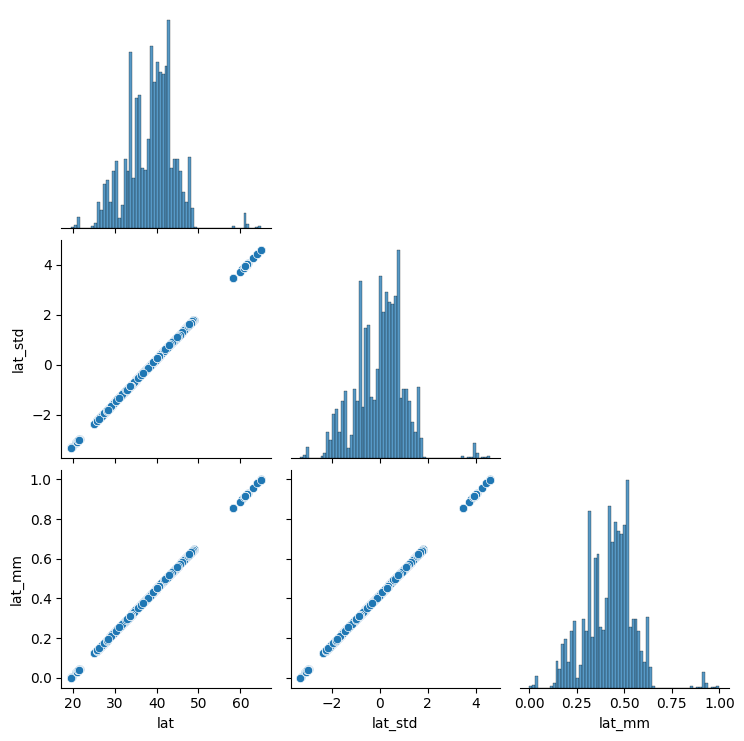

In [94]:
# Ваш код здесь
sns.pairplot(df[['lat', 'lat_std', 'lat_mm']], corner=True);

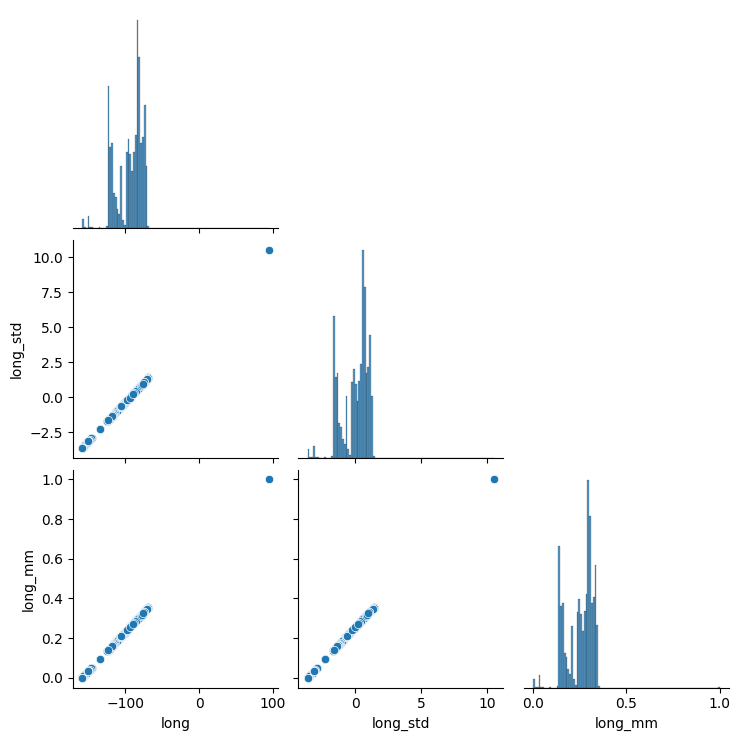

In [97]:
sns.pairplot(df[['long', 'long_std', 'long_mm']], corner=True);

### Задача 5. Признаки на основе дат

1. Выведите по отдельности колонки `posting_date` и `date`.

In [100]:
# Ваш код здесь
df['date'].sample(5)

7109    2021-04-30 20:01:12+00:00
3602    2021-04-06 18:51:28+00:00
4679    2021-04-25 19:34:23+00:00
6193    2021-04-23 18:21:59+00:00
3755    2021-04-23 16:17:32+00:00
Name: date, dtype: object

In [101]:
df['posting_date'].sample(5)

4923    2021-04-29T17:00:24-0700
3784    2021-04-13T15:02:15-0400
5040    2021-04-13T12:47:57-0400
2732    2021-05-03T10:21:11-0500
114     2021-04-27T11:34:28-0400
Name: posting_date, dtype: object

2. Ранее преобразованная колонка `date` после сохранения в файл и загрузки из него содержит данные в строковом формате, поэтому измените её тип c помощью `pd.to_datetime`.

In [108]:
# Ваш код здесь
df['date'] = pd.to_datetime(df['date'])

In [114]:
df['date']

0      2021-04-17 16:30:50+00:00
1      2021-05-03 19:40:21+00:00
2      2021-04-28 10:52:20+00:00
3      2021-04-17 14:08:57+00:00
4      2021-04-08 19:10:56+00:00
                  ...           
9614   2021-04-10 20:33:57+00:00
9615   2021-05-03 13:36:30+00:00
9616   2021-04-22 19:14:01+00:00
9617   2021-04-14 14:14:42+00:00
9618   2021-04-24 17:50:49+00:00
Name: date, Length: 9619, dtype: datetime64[ns, UTC]

3. Несколькими способами извлеките номер месяца продажи автомобиля.

3.1. Из переменной `posting_date` с помощью lambda-функции и операций над строками.

In [106]:
# Ваш код здесь
df['posting_date'].apply(lambda x: x[5:7])

0       04
1       05
2       04
3       04
4       04
        ..
9614    04
9615    05
9616    04
9617    04
9618    04
Name: posting_date, Length: 9619, dtype: object

In [113]:
df['posting_date'].apply(lambda x: x.split('-')[1])

0       04
1       05
2       04
3       04
4       04
        ..
9614    04
9615    05
9616    04
9617    04
9618    04
Name: posting_date, Length: 9619, dtype: object

3.2. Из переменной `date` с помощью lambda-функции и метода `month`.

In [118]:
# Ваш код здесь
df['date'].apply(lambda x: x.month)

0       4
1       5
2       4
3       4
4       4
       ..
9614    4
9615    5
9616    4
9617    4
9618    4
Name: date, Length: 9619, dtype: int64

3.3. Из переменной `date` с помощью `dt` и метода `month`.

In [116]:
# Ваш код здесь
df['date'].dt.month

0       4
1       5
2       4
3       4
4       4
       ..
9614    4
9615    5
9616    4
9617    4
9618    4
Name: date, Length: 9619, dtype: int64

4. Создайте любым из способов (3.2 или 3.3) признак `month`, обозначающий номер месяца размещения объявления о продаже автомобиля, и распечатайте его.

In [120]:
# Ваш код здесь
df['month'] = df['date'].dt.month
df['month'].head()

0    4
1    5
2    4
3    4
4    4
Name: month, dtype: int64

5. Создайте признак `dayofweek`, обозначающий день недели размещения объявления о продаже автомобиля, и распечатайте его.

In [122]:
# Ваш код здесь
df['dayofweek'] = df['date'].dt.day_of_week
df['dayofweek'].head()

0    5
1    0
2    2
3    5
4    3
Name: dayofweek, dtype: int64

6. Создайте признак `diff_years`, обозначающий количество лет между годом производства автомобиля и годом размещения объявления о продаже автомобиля, и распечатайте его. Дополнительные корректировки не применяйте.

In [126]:
# Ваш код здесь
df['diff_years'] = df['date'].dt.year - df['year']
df['diff_years']

0        1
1        5
2        4
3        8
4        9
        ..
9614    19
9615    13
9616    10
9617     6
9618     4
Name: diff_years, Length: 9619, dtype: int64

7. Примените стандартизацию к новым признаками и сохраните результат в новые признаки вида `month_std`.

In [127]:
# Ваш код здесь
std_scaler = StandardScaler()
# Идентифицировал параметры преобразования на датафрейме с количественными переменными.
std_scaler.fit(df[['month', 'dayofweek', 'diff_years']])
# Применил преобразование для датафрейма с количественными переменными и сохранил в новую переменную
std_scaled = std_scaler.transform(df[['month', 'dayofweek', 'diff_years']])
# Добавил даные в исходный датафрейм получившиеся новые признаки
df[['month_std', 'dayofweek_std', 'diff_years_std']] = std_scaled

### Задача 6. Сохранение датафрейма для этапа моделирования

1. Удалите колонки, которые были исходными для формирования признаков, а также новые признаки, которые были добавлены с целью обучения.  Сохраните новый датафрейм в переменную `df_prepared`.

In [131]:
# Допишите код

columns_for_drop = ['year', 'url', 'region', 'region_url', 'manufacturer',
                    'model', 'fuel', 'odometer', 'title_status', 'transmission',
                    'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
                    'odometer_km', 'odometer/price', 'region_new', 'region_corrected', 'manufacturer_model',
                    'desc_len', 'model_in_desc', 'short_model', 'lat_mm', 'long_mm', 'date', 'std_scaled_price',
                    'month', 'dayofweek', 'diff_years',
                    'odometer/price_std']
df_prepared = df.drop(labels = columns_for_drop, axis = 1)

2. Распечатайте оставшийся список колонок и размерность финального датафрейма.

In [132]:
# Ваш код здесь
df_prepared.columns

Index(['id', 'price', 'price_category', 'fuel_diesel', 'fuel_electric',
       'fuel_gas', 'fuel_hybrid', 'fuel_other', 'std_scaled_odometer',
       'short_model_',
       ...
       'price_category_low', 'price_category_medium', 'lat_std', 'long_std',
       'year_std', 'desc_len_std', 'model_in_desc_std', 'month_std',
       'dayofweek_std', 'diff_years_std'],
      dtype='object', length=1209)

In [133]:
df_prepared.shape

(9619, 1209)

3. Запишите преобразованный датафрейм в файл `data/vehicles_dataset_prepared.csv`, индекс не сохраняйте.

In [135]:
# Ваш код здесь
df_prepared.to_csv('/content/drive/MyDrive/SkillBox/Feature_Processing/vehicles_dataset_prepared.csv', index=False)

## Описание преобразованного датасета:
- `id`— идентификатор записи;
- `is_manufacturer_name`— признак производителя автомобиля;

- `region_*`— регион;
- `x0_*`— тип топлива;
- `manufacturer_*`— производитель;
- `short_model_*`— сокращённая модель автомобиля;
- `title_status_*`— статус;
- `transmission_*`— коробка передач;
- `state_*`— штат;
- `age_category_*`— возрастная категория автомобиля;

- `std_scaled_odometer`— количество пройденных миль (после стандартизации);
- `year_std`— год выпуска (после стандартизации);
- `lat_std`— широта (после стандартизации);
- `long_std`— долгота (после стандартизации);
- `odometer/price_std`— отношение стоимости к пробегу автомобиля (после стандартизации);
- `desc_len_std`— количество символов в тексте объявления о продаже (после стандартизации);
- `model_in_desc_std`— количество наименований модели автомобиля в тексте объявления о продаже (после стандартизации);
- `model_len_std`— длина наименования автомобиля (после стандартизации);
- `model_word_count_std`— количество слов в наименовании автомобиля (после стандартизации);
- `month_std`— номер месяца размещения объявления о продаже автомобиля (после стандартизации);
- `dayofweek_std`— день недели размещения объявления о продаже автомобиля (после стандартизации);
- `diff_years_std`— количество лет между годом производства автомобиля и годом размещения объявления о продаже автомобиля (после стандартизации);

- `price`— стоимость;
- `price_category`– категория цены.